In [1]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Number of synthetic healthy posts
num_posts = 1000

# Generate example authors
authors = [f"user_{i}" for i in range(1, num_posts + 1)]

# Example positive/neutral post bodies
bodies = [
    
    "Had a productive day at work and met my friends in the evening.",
    "Life is going well and I am enjoying every moment.",
    "Feeling content and grateful for my family.",
    "Went for a walk and enjoyed the weather.",
    "I feel healthy and energetic after my morning workout.",
    "Had a fun time cooking a new recipe today.",
    "Spent time reading a good book and relaxing.",
    "Just finished a movie and had a great time.",
    "Feeling motivated and optimistic for the future.",
    "I enjoyed my hobby today and feel refreshed.",
    "Had a peaceful and calm day, feeling positive.",
    "I am cheerful and smiling throughout the day.",
    "Feeling productive and satisfied with my progress.",
    "I am confident and optimistic about the future."
]

# Example titles
titles = [
    "Feeling good today", "Had a great day", "Loving life",
    "Happy and content", "Enjoying my weekend", "Life is peaceful",
    "Productive day at work", "Relaxing afternoon", "Grateful for family",
    "Excited for the future", "Healthy lifestyle", "Fun day with friends",
    "Just chilling", "Enjoyed a walk", "Good sleep last night",
    "Feeling energetic", "Reading a book", "Watching a movie",
    "Cooking something new", "Feeling positive"
]

# Generate data
data = []
for i in range(num_posts):
    author = authors[i]
    body = random.choice(bodies)
    created_utc = (datetime.now() - timedelta(days=random.randint(0, 365))).isoformat()
    post_id = f"id_{i}"
    num_comments = random.randint(0, 5)
    score = random.randint(1, 20)
    subreddit = "healthy"
    title = random.choice(titles)
    upvote_ratio = round(random.uniform(0.8, 1.0), 2)
    url = f"https://www.reddit.com/r/healthy/{post_id}"
    
    data.append([author, body, created_utc, post_id, num_comments, score, subreddit, title, upvote_ratio, url])

# Create DataFrame
df_healthy = pd.DataFrame(data, columns=[
    "author", "body", "created_utc", "id", "num_comments", "score",
    "subreddit", "title", "upvote_ratio", "url"
])

# Save to CSV
df_healthy.to_csv("healthy.csv", index=False)
print("Healthy dataset created with shape:", df_healthy.shape)
print(df_healthy.head())





Healthy dataset created with shape: (1000, 10)
   author                                            body  \
0  user_1     Just finished a movie and had a great time.   
1  user_2     Feeling content and grateful for my family.   
2  user_3     Feeling content and grateful for my family.   
3  user_4  Had a peaceful and calm day, feeling positive.   
4  user_5     Feeling content and grateful for my family.   

                  created_utc    id  num_comments  score subreddit  \
0  2025-09-06T12:37:13.067859  id_0             0     15   healthy   
1  2025-04-25T12:37:13.067859  id_1             1     11   healthy   
2  2025-08-07T12:37:13.067859  id_2             5     18   healthy   
3  2025-02-20T12:37:13.067859  id_3             2      2   healthy   
4  2025-03-14T12:37:13.067859  id_4             4     18   healthy   

                    title  upvote_ratio                                    url  
0       Feeling energetic          0.83  https://www.reddit.com/r/healthy/id_0  
1  

In [2]:
import pandas as pd

healthy = pd.read_csv("healthy.csv")
healthy["source_file"] = "healthy.csv"


In [3]:


import pandas as pd
import numpy as np
import os

# List of CSV file paths
paths = ["ptsd.csv", "depression.csv", "aspergers.csv" ,"adhd.csv" , "ocd.csv" , "healthy.csv"]

# Load all CSVs into a dictionary
dfs = {}
for p in paths:
    name = os.path.basename(p)   # filename as identifier
    df = pd.read_csv(p)
    df["source_file"] = name     # add a column indicating source
    dfs[name] = df

# Align columns (union of all)
all_cols = sorted({c for df in dfs.values() for c in df.columns})

aligned = []
for name, df in dfs.items():
    # Add missing columns as NaN
    for c in all_cols:
        if c not in df.columns:
            df[c] = np.nan
    df = df[all_cols + ["source_file"]]  # reorder
    aligned.append(df)

# Merge all into one dataframe
merged = pd.concat(aligned, ignore_index=True)

# Shuffle (jumble order)
merged = merged.sample(frac=1, random_state=42).reset_index(drop=True)

print("Merged shape:", merged.shape)
print(merged.head())



Merged shape: (152288, 12)
               author                                               body  \
0          Daniel_128  I have found that weed sends me into flashback...   
1  No-Watercress-9116  you can comment the subs you joined if you wan...   
2      StrangerIsDead  i don’t know if this is an ADHD thing or a “my...   
3     paperia_paperia  \nI (25F) lost my dream job and my long term r...   
4    throwaway2019114  Feeling pretty shell shocked right now so diff...   

                created_utc      id  num_comments  score     source_file  \
0  2021-11-18T20:42:24.000Z  qwz3k1            16     14        ptsd.csv   
1  2021-11-13T14:54:59.000Z  qt2vun             8      4   aspergers.csv   
2  2021-12-06T01:20:26.000Z  r9utuj             4      1        adhd.csv   
3  2021-12-15T19:26:36.000Z  rh746k             2      1  depression.csv   
4  2019-11-14T14:06:51.000Z  dw9zji             0      3        ptsd.csv   

    subreddit                                           tit

In [4]:
# Drop rows where 'author' is "[deleted]"
merged = merged[merged["author"].str.lower() != "[deleted]"]

# Drop rows where the text/body itself is "[deleted]" or "[removed]"
if "body" in merged.columns:
    merged = merged[~merged["body"].str.lower().isin(["[deleted]", "[removed]"])]

# Reset index after dropping
merged = merged.reset_index(drop=True)

print("Shape after cleaning:", merged.shape)
print(merged.head())
print(merged)

Shape after cleaning: (85826, 12)
               author                                               body  \
0          Daniel_128  I have found that weed sends me into flashback...   
1  No-Watercress-9116  you can comment the subs you joined if you wan...   
2      StrangerIsDead  i don’t know if this is an ADHD thing or a “my...   
3     paperia_paperia  \nI (25F) lost my dream job and my long term r...   
4    throwaway2019114  Feeling pretty shell shocked right now so diff...   

                created_utc      id  num_comments  score     source_file  \
0  2021-11-18T20:42:24.000Z  qwz3k1            16     14        ptsd.csv   
1  2021-11-13T14:54:59.000Z  qt2vun             8      4   aspergers.csv   
2  2021-12-06T01:20:26.000Z  r9utuj             4      1        adhd.csv   
3  2021-12-15T19:26:36.000Z  rh746k             2      1  depression.csv   
4  2019-11-14T14:06:51.000Z  dw9zji             0      3        ptsd.csv   

    subreddit                                       

In [5]:
# Drop duplicate columns
merged = merged.loc[:, ~merged.columns.duplicated()]

# Now this will work:
merged["label"] = merged["source_file"].astype(str).str.replace(".csv", "", regex=False)

print(merged[["source_file", "label"]].head())



import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# --------------------
# 1. Prepare labels
# --------------------
# We'll use the `source_file` column as the label for disorder
merged["label"] = merged["source_file"].str.replace(".csv", "", regex=False)


import nltk
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")

lemmatizer = WordNetLemmatizer()

# --------------------
# 2. Clean the text
# --------------------
def clean_text(s):
    if pd.isna(s):
        return ""
    s = str(s).lower()
    s = re.sub(r"http\S+|www\.\S+", " ", s)   # remove URLs
    s = re.sub(r"@\w+", " ", s)               # remove mentions
    s = re.sub(r"[^a-z\s]", " ", s)           # keep only letters
    s = re.sub(r"\s+", " ", s).strip()
    return s

merged["clean_text"] = merged["body"].apply(clean_text)

# --------------------
# 3. Train/test split
# --------------------
X = merged["clean_text"]
y = merged["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --------------------
# 4. TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=15000,      # more features
    stop_words="english",
    ngram_range=(1,2),       # unigrams + bigrams
    sublinear_tf=True        # better handling of frequent words
)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("Train shape:", X_train_tfidf.shape)
print("Test shape:", X_test_tfidf.shape)
print("Classes:", y.unique())


      source_file       label
0        ptsd.csv        ptsd
1   aspergers.csv   aspergers
2        adhd.csv        adhd
3  depression.csv  depression
4        ptsd.csv        ptsd


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...


Train shape: (68660, 15000)
Test shape: (17166, 15000)
Classes: <StringArray>
['ptsd', 'aspergers', 'adhd', 'depression', 'ocd', 'healthy']
Length: 6, dtype: str


In [6]:
# Replace NaN with empty string
merged["body"] = merged["body"].fillna("")

# OR drop rows where body is missing
# merged = merged.dropna(subset=["body"])



from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# ---------------------------
# 1. Features + Labels
# ---------------------------
merged["body"] = merged["body"].fillna("")   # fix NaNs here
X = merged["body"]
y = merged["label"]

# ---------------------------
# 2. Train/Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------
# 3. Vectorize Text (TF-IDF)
# ---------------------------
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("Train shape:", X_train_vec.shape)
print("Test shape:", X_test_vec.shape)

# ---------------------------
# 4. Train Classifier
# ---------------------------
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(
    max_iter=500,           # give more iterations
    n_jobs=-1,
    class_weight="balanced" # handle class imbalance
)
clf.fit(X_train_vec, y_train)

# ---------------------------
# 5. Evaluate
# ---------------------------
y_pred = clf.predict(X_test_vec)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))





Train shape: (68660, 5000)
Test shape: (17166, 5000)


C:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


Classification Report:
               precision    recall  f1-score   support

        adhd       0.90      0.85      0.88      4038
   aspergers       0.67      0.81      0.74      2698
  depression       0.73      0.80      0.76      2734
     healthy       0.99      1.00      1.00       200
         ocd       0.93      0.82      0.87      4939
        ptsd       0.82      0.80      0.81      2557

    accuracy                           0.82     17166
   macro avg       0.84      0.85      0.84     17166
weighted avg       0.83      0.82      0.83     17166

Confusion Matrix:
 [[3448  290  186    0   63   51]
 [ 136 2194  202    1   72   93]
 [  94  196 2197    1   98  148]
 [   0    0    0  200    0    0]
 [ 101  421  221    0 4036  160]
 [  43  166  213    0   92 2043]]


In [7]:
y_proba = clf.predict_proba(X_test_vec)
# Adjust thresholds manually per class if needed

import joblib
joblib.dump(clf, "logreg_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

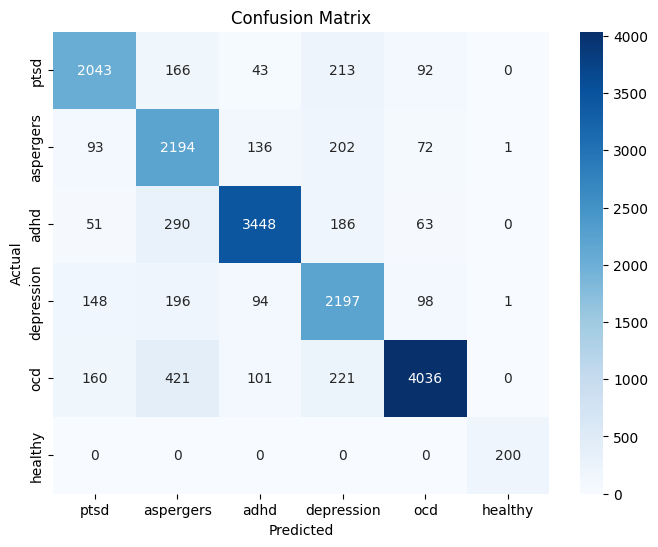

Model and vectorizer saved successfully!
Predicted disorder: ptsd


In [8]:
import pandas as pd
import joblib
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# 1. Error Analysis
# ---------------------------
# Create a DataFrame with true labels, predictions, and text
results = X_test.to_frame()
results["true_label"] = y_test.values
results["pred_label"] = y_pred

# Save results for inspection
results.to_csv("predictions_analysis.csv", index=False)

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred, labels=y.unique())
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=y.unique(), yticklabels=y.unique(), cmap="Blues")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

# ---------------------------
# 2. Save Model & Vectorizer
# ---------------------------
joblib.dump(clf, "logreg_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
print("Model and vectorizer saved successfully!")

# ---------------------------
# 3. Prediction Function
# ---------------------------
import re
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r"http\S+|www\.\S+", " ", text)
    text = re.sub(r"@\w+", " ", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

def predict_disorder(text):
    """
    Input: raw text string
    Output: predicted disorder label
    """
    cleaned = clean_text(text)
    vec = vectorizer.transform([cleaned])
    return clf.predict(vec)[0]

# Example usage
example_post = "I can't sleep and feel anxious all the time."
predicted_label = predict_disorder(example_post)
print(f"Predicted disorder: {predicted_label}")



In [9]:
import joblib

# Save the trained model
joblib.dump(clf, "logreg_model.pkl")

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [10]:
def predict_disorder(text, threshold=0.4):
    """
    Predict disorder label with a threshold for 'healthy/none' class.
    If the model is not confident (max probability < threshold), return 'healthy'.
    """
    cleaned = clean_text(text)
    vec = vectorizer.transform([cleaned])
    probs = clf.predict_proba(vec)[0]          # get probability for each class
    max_prob = probs.max()
    if max_prob < threshold:
        return "healthy"
    else:
        return clf.classes_[probs.argmax()]   # original prediction

# Example usage
example_post = "I feel very good."
predicted_label = predict_disorder(example_post)
print(f"Predicted disorder: {predicted_label}")


Predicted disorder: depression


In [11]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nDetailed Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.8224397063963649

Detailed Report:

              precision    recall  f1-score   support

        adhd       0.90      0.85      0.88      4038
   aspergers       0.67      0.81      0.74      2698
  depression       0.73      0.80      0.76      2734
     healthy       0.99      1.00      1.00       200
         ocd       0.93      0.82      0.87      4939
        ptsd       0.82      0.80      0.81      2557

    accuracy                           0.82     17166
   macro avg       0.84      0.85      0.84     17166
weighted avg       0.83      0.82      0.83     17166

